In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch

device = "cuda:0"
torch.set_default_device(device)

from LION.experiments import ct_experiments
experiment = ct_experiments.LowDoseCTRecon(dataset="LIDC-IDRI")
lidc_dataset = experiment.get_training_dataset()

from scripts.example_scripts.PCM_CS_demo import run_demo

Preparing patient list, this may take time....
Patient lists ready for train dataset


Using device: cuda:0
Running FISTA reconstruction: 1000 iterations, lambda=10...


FISTA l1:  64%|██████▍   | 641/1000 [00:04<00:02, 146.55it/s]


Running debiasing: 10 iterations...


Debiasing LS:  10%|█         | 1/10 [00:00<00:00, 71.43it/s]


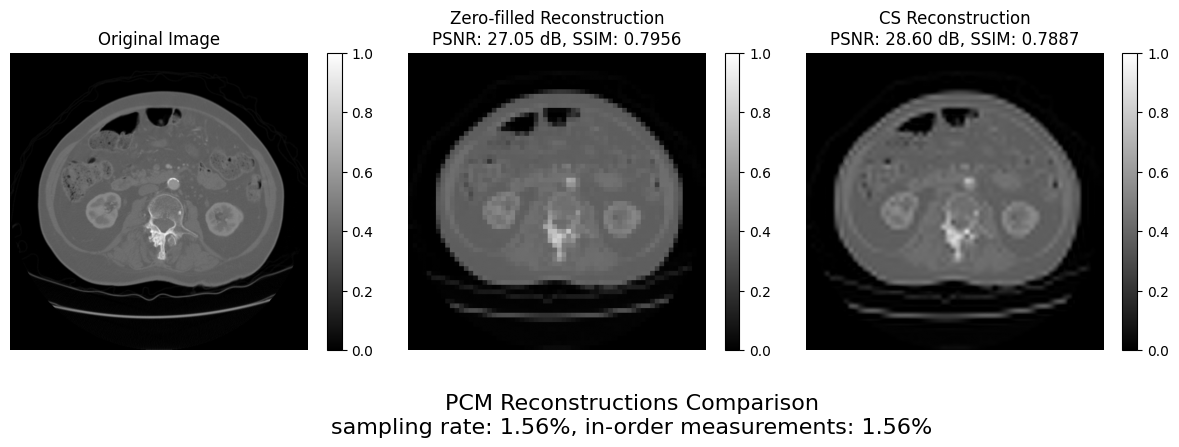

In [3]:
run_demo(
    algo="fista",
    dataset=lidc_dataset,
    # subtract_from_J=1,
    # delta_divided_by=4,
    # subtract_from_J=2,
    # delta_divided_by=16,
    subtract_from_J=3,
    delta_divided_by=64,
    lam=10,  # Good for Wavelet2D_DB4
    max_iter=1000,
    debias_max_iter=10,
    # verbose=True,
    clim=(0, 1),
)

Using device: cuda:0
Running SPGL1 reconstruction: 1000 iterations, lambda=2000.0...

SPGL1
No. rows              :     4096     
No. columns           :   262144

Initial tau           : 2.00e+03     
Two-norm of b         : 6.95e+04

Optimality tol        : 1.00e-04     
Target one-norm of x  : 2.00e+03

Basis pursuit tol     : 1.00e-06     
Maximum iterations    :     1000

iterr      Objective   Relative Gap      gnorm   stepg   nnz_x   nnz_g

    0  6.9524672e+04  7.8745012e+00   9.52e+06     0.0       0       0       
    1  6.6218469e+04  1.2667962e+01   9.50e+06    -1.8     321       0       
    2  1.6177494e+03  4.3205288e+01   4.22e+04     0.0   14126       1       
    3  8.5778363e+02  8.3515678e+01   2.01e+04     0.0   10598       1       
    4  3.0886642e+02  1.1484614e+02   4.49e+03     0.0    8378       1       
    5  1.1724771e+02  1.1790449e+03   4.47e+03     0.0    7900       1       
    6  9.9670593e+01  2.2595349e+03   6.07e+03     0.0    7807       1       
  

Debiasing LS: 100%|██████████| 10/10 [00:00<00:00, 146.71it/s]


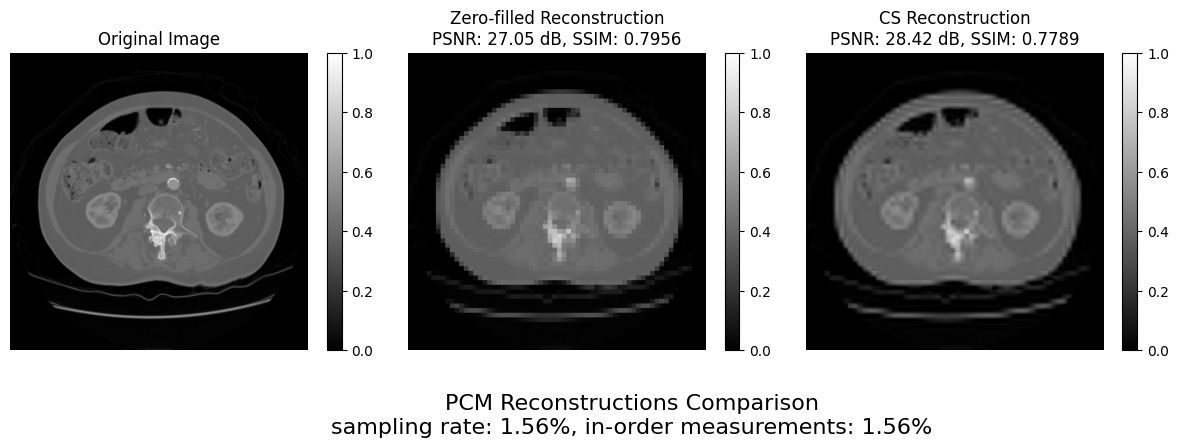

In [4]:
run_demo(
    algo="spgl1",
    dataset=lidc_dataset,
    # subtract_from_J=1,
    # delta_divided_by=4,
    # subtract_from_J=2,
    # delta_divided_by=16,
    subtract_from_J=3,
    delta_divided_by=64,
    lam=2e3,
    max_iter=1000,
    debias_max_iter=10,
    debias_support_tol=1e-5,
    debias_tol=1e-7,
    verbose=True,
    clim=(0, 1),
)